# Scipy

Scipy zapravo nije jedna biblioteka, nego paket koji se sastoji od raznovrsnih biblioteka koje nemaju jedinstveni "žarišni objekt" (kao što je `ndarray` za Numpy, `DataFrame` za Pandas, ili `Axes` za Matplotlib) oko kojeg su koncentrirane. Zato obično ne uvozimo scipy kao takav, nego pojedine biblioteke.

## special

In [1]:
from scipy import special

Razne specijalne funkcije (rješenja važnih diferencijalnih jednadžbi): Airyjeve, Besselove/Kelvinove, Mathieuove, Struveove, ...; i distribucije: beta, gama, hipergeometrijska, ...

Mogu se pozvati s Numpyjevim tenzorima (uz uobičajeni broadcasting), a neke i s kompleksnim brojevima.

In [2]:
special.j0(1)

0.7651976865579665

## integrate

In [3]:
from scipy import integrate

Razne metode numeričke integracije, bilo općenitih funkcija zadanih izrazom, tablicama, ili pri numeričkom rješavanju diferencijalnih jednadžbi.

$\int_{-2}^3\left|x\right|\,dx\approx$

In [4]:
print(*integrate.quad(abs, -2, 3), sep=' ± ')

6.500000000000002 ± 7.216449660063519e-15


$\int_{\frac13}^{\frac12}\int_{2x}^{\infty}x^y\,dx\,dy\approx$

In [5]:
integral, greška = integrate.dblquad(pow, 1/3, 1/2, lambda x: 2*x, lambda x: float('inf'))
if greška > 0.01: print(f'! Velika greška: {greška:.1%}')
integral

! Velika greška: 100.0%


/home/veky/.local/lib/python3.8/site-packages/scipy/integrate/_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


-0.09122982508928275

Ako već nemamo ugrađenu funkciju koju želimo integrirati, odnosno funkciju koja vraća granicu integracije za neku od sljedećih varijabli (osim prve), uvijek ih možemo konstruirati pomoću `def` ili `lambda`.

Odredimo numerički trostruki integral (u Kartezijevim koordinatama) koji predstavlja volumen jedinične kugle u $\mathbb R^3$, i provjerimo da se njegova točna vrijednost $\frac43\pi$ nalazi unutar intervala numeričke preciznosti.

In [6]:
import numpy as np
integral, greška = integrate.tplquad(lambda x, y, z: 1,  # gustoća koju integriramo
    -1, 1,  # granice po x
    lambda x: -np.sqrt(1-x**2), lambda x: np.sqrt(1-x**2),  # granice po y
    lambda x, y: -np.sqrt(1-x**2-y**2), lambda x, y: np.sqrt(1-x**2-y**2)  # granice po z
)
abs(integral - 4/3 * np.pi) < greška < 1e-6

True

## optimize

In [7]:
from scipy import optimize

Razne metode optimizacije (minimizacije/maksimizacije, linearnog programiranja, pridruživanja/sparivanja, ...).

In [8]:
(ekstrem := optimize.minimize_scalar(lambda x: x**x, method='brent'))

     fun: 0.6922006275553464
 message: '\nOptimization terminated successfully;\nThe returned value satisfies the termination criteria\n(using xtol = 1.48e-08 )'
    nfev: 16
     nit: 12
 success: True
       x: 0.3678794467032398

In [9]:
ekstrem.x, ekstrem.fun

(0.3678794467032398, 0.6922006275553464)

In [10]:
ekstrem.x - np.exp(-1)

5.53179746454191e-09

Također ima metode za traženje nultočaka, fiksnih točaka, i sličnog.

In [11]:
optimize.root(np.sin, -6)

    fjac: array([[-1.]])
     fun: array([2.4492936e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([1.03189166e-09])
       r: array([-1.])
  status: 1
 success: True
       x: array([-6.28318531])

In [12]:
import functools
fix = functools.partial(optimize.fixed_point, x0=1)
fix(np.arccos) == fix(np.cos)

True

## interpolate

Interpolacije u jednoj ili više dimenzija, splajnovi, opcionalno zaglađivanje, ...

In [13]:
from scipy import interpolate

In [14]:
xevi = np.pi / np.array([np.inf, 6, 4, 3, 2])
yovi = np.sqrt(np.arange(5)) / 2
assert np.allclose(np.sin(xevi), yovi)

In [15]:
splajn = interpolate.splrep(xevi, yovi)
assert np.allclose(interpolate.splev(xevi, splajn), yovi)

In [16]:
punox = np.linspace(0, np.pi/2)
punoy = interpolate.splev(punox, splajn)
np.max(np.abs(np.sin(punox) - punoy))

0.0008894208100640455

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

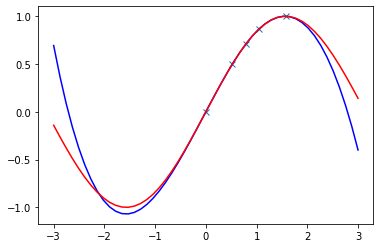

In [18]:
višex = np.linspace(-3, 3)
plt.plot(xevi,  yovi,                             'x',
         višex, interpolate.splev(višex, splajn), 'b',
         višex, np.sin(višex),                    'r')

Jedan kvaziduhoviti primjer: https://py.checkio.org/mission/sun-angle/publications/veky/python-3/figure-it-out-yourself/

## fft, signal

Brza (i inverzna) Fourierova transformacija, u jednoj ili više dimenzija, diskretna sinusna/kosinusna transformacija, Hankelova transformacija, ...; obrada signala

## linalg

In [19]:
from scipy import linalg

Razne funkcije iz linearne algebre; uglavnom se pozivaju na Numpyjevim tenzorima.

In [20]:
A = np.array([[1, 1, 3, 1],
              [1, 1, 2, 1],
              [3, 1, 1, 1],
              [1, 2, 1, 1]])
linalg.inv(A)

array([[ 5.00000000e-01, -1.00000000e+00,  5.00000000e-01,
         8.32667268e-17],
       [ 1.00000000e+00, -2.00000000e+00,  1.11022302e-16,
         1.00000000e+00],
       [ 1.00000000e+00, -1.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-3.50000000e+00,  6.00000000e+00, -5.00000000e-01,
        -1.00000000e+00]])

In [21]:
np.allclose(A @ _, np.eye(len(A)))

True

In [22]:
linalg.solve(A, b := [2, 3, 8, 1])

array([ 2., -3., -1.,  6.])

In [23]:
np.allclose(A @ _, b)

True

In [24]:
linalg.det(np.random.standard_normal((200, 200)))

4.692425475051633e+186

In [25]:
{red: linalg.norm(A, red) for red in (-np.inf, -2, -1, 1, 2, np.inf, 'f')}

{-inf: 5.0,
 -2: 0.1311499446826709,
 -1: 4.0,
 1: 7.0,
 2: 5.651349661021129,
 inf: 6.0,
 'f': 6.164414002968976}

In [26]:
linalg.norm(A, 2)

5.651349661021129

In [27]:
linalg.norm(b, 0)

4.0

In [28]:
redovi = np.linspace(-5, 5, 41)

In [29]:
redovi

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75,  5.  ])

https://www.displayr.com/what-is-linear-regression/

In [30]:
prodaja = np.array([651, 762, 856, 1_063, 1_190, 1_298, 1_421, 1_440, 1_518])
oglasi = np.array([23, 26, 30, 34, 43, 48, 52, 57, 58])

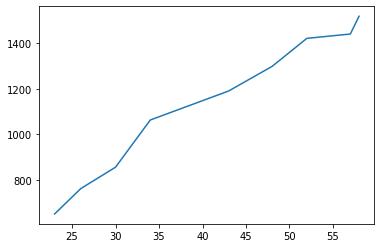

In [31]:
plt.plot(oglasi, prodaja)

In [32]:
matrica = np.transpose(np.vstack([oglasi, np.ones_like(oglasi)]))

In [33]:
(k, l), odstupanje, rang, singularne_vrijednosti = linalg.lstsq(matrica, prodaja)
assert rang == 2
print(f'prodaja = {k:.0f} oglasi + {l:.0f}')
odstupanje

prodaja = 23 oglasi + 168


18803.929200803832

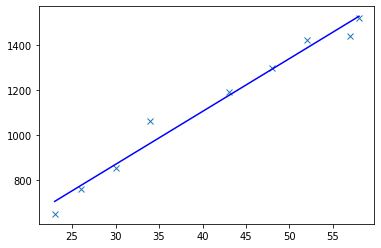

In [34]:
xevi = np.linspace(np.min(oglasi), np.max(oglasi))
plt.plot(oglasi, prodaja, 'x', xevi, k * xevi + l, 'b')

Ovdje postoje i razne funkcije za rastave matrica: SVD, LU, QR, Schurov, interpolacijski, ...
Također brojne matrične funkcije (uobičajeno Numpyjevo ime s dodatkom `m`). `funm` čak može primiti "bilo kakve" (vjerojatno ipak analitičke:) funkcije i primijeniti ih na kvadratnu matricu (ili vektor).

In [35]:
[ime for ime in dir(linalg) if ime.endswith('m') and '_' not in ime]  # izbacite uljeza! ;-)

['coshm',
 'cosm',
 'expm',
 'funm',
 'logm',
 'norm',
 'signm',
 'sinhm',
 'sinm',
 'sqrtm',
 'tanhm',
 'tanm']

... i brojne specijalne matrice (Hilbertova, Toeplitzova, Hankelova, Vandermondeova (u Numpy), ...).

In [36]:
linalg.hilbert(5)

array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.5       , 0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.33333333, 0.25      , 0.2       , 0.16666667, 0.14285714],
       [0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.2       , 0.16666667, 0.14285714, 0.125     , 0.11111111]])

In [37]:
np.vander(niz := [0, 7, 16, 9, 11])

array([[    0,     0,     0,     0,     1],
       [ 2401,   343,    49,     7,     1],
       [65536,  4096,   256,    16,     1],
       [ 6561,   729,    81,     9,     1],
       [14641,  1331,   121,    11,     1]])

In [38]:
import itertools
np.prod([x - y for x, y in itertools.combinations(niz, 2)]) / linalg.det(_)

1.0000000000000049

## csgraph
## spatial

Razni algoritmi na grafovima, prostorni algoritmi (Delaunayeva triangulacija, Voronojevi dijagrami, konveksne ljuske, ...)

## stats

Statistike raznih distribucija, slučajno generiranje, funkcija distribucije i njen inverz, statistički testovi, kvazi Monte Carlo, ...

## ndimage

Obrada slika (filteri, interpolacija, mjere, transformacije, ...)

## io

Interoperabilnost Scipyja s drugim alatima preko zapisa u datoteke u uobičajenim formatima, i čitanja takvih datoteka.
(Matlab, IDL, Matrix Market, Wav, Arff, NetCDF)